In [2]:
# load the data

In [3]:
import os 
import tarfile
from six.moves import urllib

download_root="https://raw.githubusercontent.com/ageron/handson-ml/master/"
housing_path = "datasets/housing"
datafile_name = "housing.tgz"
housing_url = download_root+housing_path+'/'+datafile_name

def fetch_housing_data(housing_url=housing_url,housing_path = housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,datafile_name)
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz= tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

In [4]:
import pandas as pd
file_path = os.path.join(housing_path,'housing.csv')
housing=pd.read_csv(file_path)

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


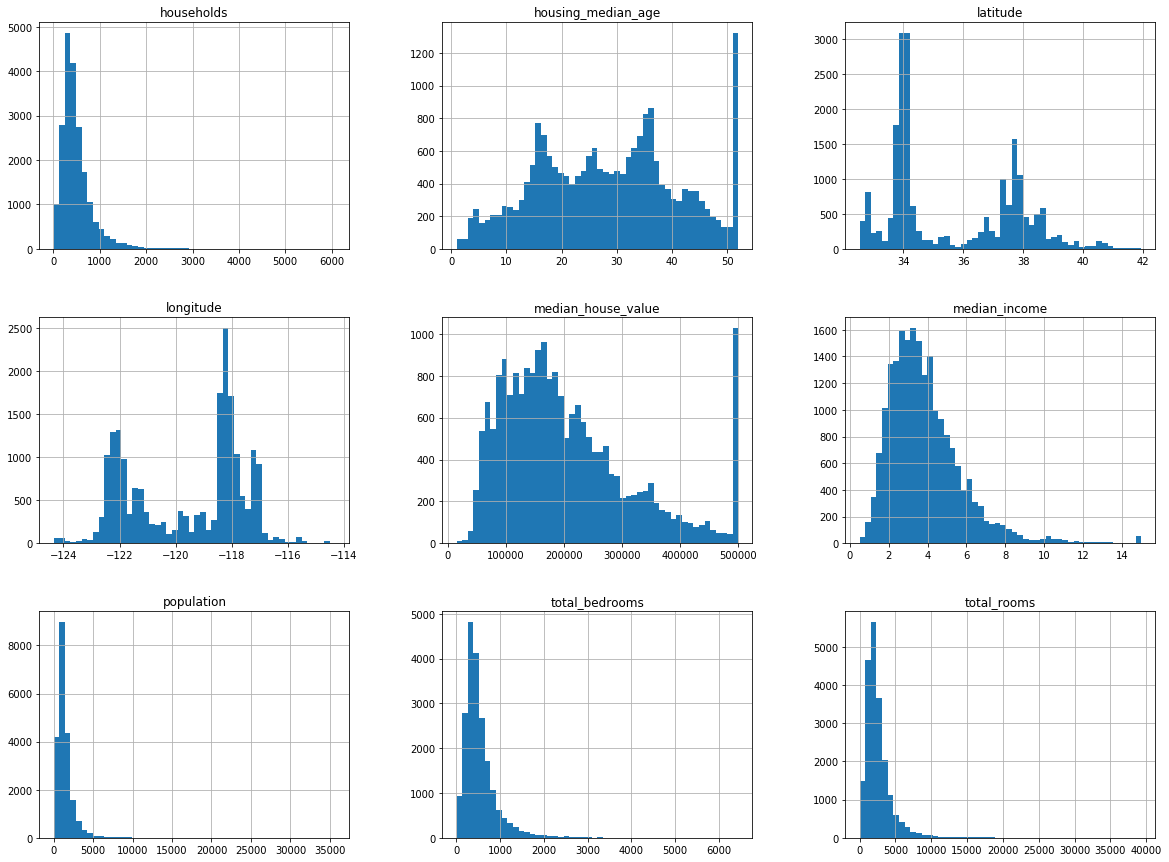

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [10]:
import numpy as np
def split_dataset(data,test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    print(shuffled_indices)
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
train_set,test_set = split_dataset(housing,0.2)
print("length of train set is %d and length of test set is %d"%(len(train_set),len(test_set)))

[20046  3024 15663 ...  5390   860 15795]
length of train set is 16512 and length of test set is 4128


In [19]:
import hashlib
housing_with_id = housing.reset_index()

def check_in_test_set(identifier,test_ratio,hash):
    return hash(np.int64(identifier)).digest()[-1]<256*test_ratio

def split_train_test_by_id(data,test_ratio,id_column,hash = hashlib.md5):
    id_column=data[id_column]
    id_in_test = id_column.apply(lambda id_:check_in_test_set(id_,0.2,hash))
    return data.loc[~id_in_test],data.loc[id_in_test]

train_set,test_set = split_train_test_by_id(housing_with_id,0.2,"index")
print(len(train_set),len(test_set))

16362 4278


In [24]:
housing_with_id["id"]=housing["longitude"]*1000+housing["latitude"]
train_set,test_set =split_train_test_by_id(housing_with_id,0.2,"id")
print(len(train_set),len(test_set))

16267 4373


In [26]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing_with_id,test_size=0.2,random_state=42)
print(len(train_set),len(test_set))

16512 4128


In [37]:
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5,5,inplace=True)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1,test_size=0.2,random_state = 42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [52]:
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

def income_cat_proportions(data):
    return data.value_counts()/len(data)

compare_pro = pd.DataFrame({"Overall":income_cat_proportions(housing["income_cat"]),
                            "strat_split":income_cat_proportions(strat_test_set["income_cat"]),
                           "rand_split":income_cat_proportions(test_set["income_cat"])}).sort_index()
compare_pro["strat_error(%)"] = 100*compare_pro["strat_split"]/compare_pro["Overall"] - 100
compare_pro["random_error(%)"] = 100*compare_pro["rand_split"]/compare_pro["Overall"]-100
compare_pro

,Overall,rand_split,strat_split,strat_error(%),random_error(%)
1.0,0.039826,0.040213,0.039729,-0.243309,0.973236
2.0,0.318847,0.324370,0.318798,-0.015195,1.732260
3.0,0.350581,0.358527,0.350533,-0.013820,2.266446
4.0,0.176308,0.167393,0.176357,0.027480,-5.056334
5.0,0.114438,0.109496,0.114583,0.127011,-4.318374


In [54]:
for set in(strat_train_set,strat_test_set):
    set.drop(["income_cat"],axis=1,inplace=True)

In [55]:
housing= strat_train_set.copy()

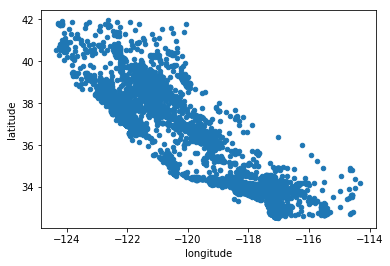

In [56]:
housing.plot(kind="scatter",x="longitude",y="latitude")

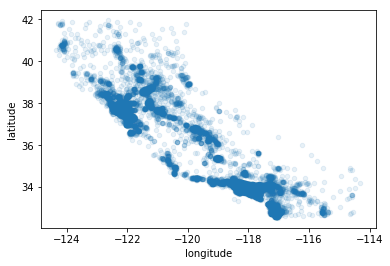

In [60]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha = 0.1)

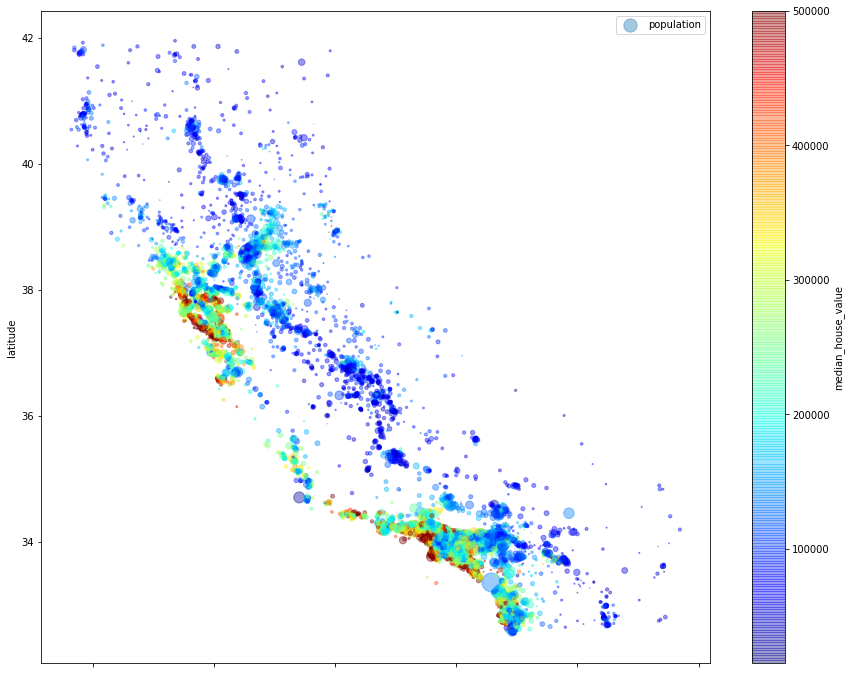

In [81]:
housing.plot(kind="scatter",x="longitude",y="latitude",s=housing["population"]/100,c="median_house_value",label = "population",
             cmap=plt.get_cmap("jet"),colorbar=True,alpha=0.4,figsize=(15,12))
plt.legend()


In [69]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F99DF5AEB8>,
      dtype=object)

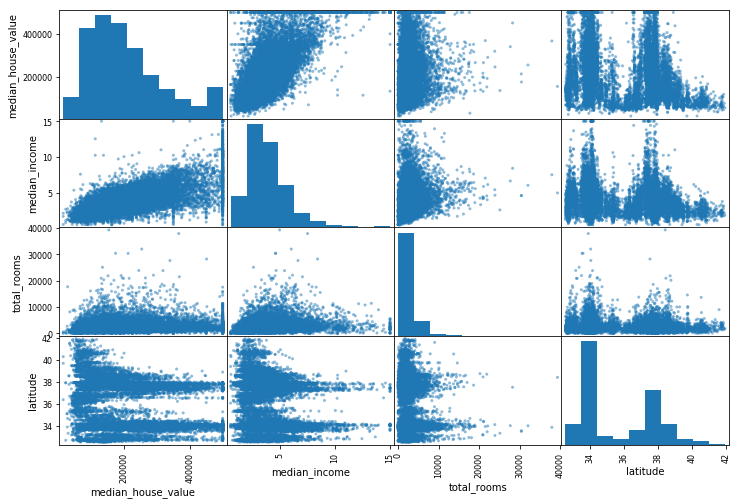

In [75]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","latitude"]
scatter_matrix(housing[attributes],figsize=(12,8))

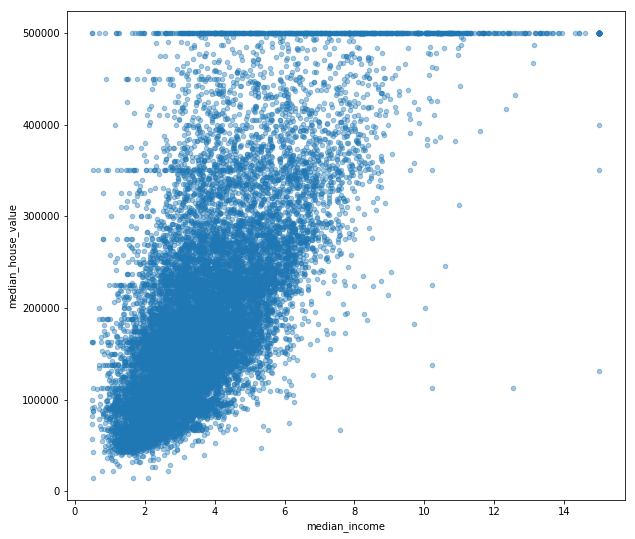

In [79]:
housing.plot(kind="scatter",y="median_house_value",x="median_income",figsize=(10,9),alpha=0.4)

In [94]:
housing["room_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedroom_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
room_per_household          0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedroom_per_room           -0.259984
Name: median_house_value, dtype: float64

In [99]:
housing = strat_train_set.drop("median_house_value",axis=1)
labels = strat_train_set["median_house_value"].copy()

In [106]:
housing.dropna(subset = ["total_bedrooms"])
housing.drop("total_bedrooms",axis=1)
median=housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)

In [126]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
housing_num=housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)
imputer.statistics_


array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [127]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [132]:
X=imputer.transform(housing_num)
housing_tr = pd.DataFrame(X,columns=housing_num.columns)
imputer.strategy

'median'

In [145]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded=encoder.fit_transform(housing_cat)
housing_cat_encoded[:20]
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [144]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 3, 2, 2, 2],
      dtype=int64)

In [153]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder()
print(housing_cat_encoded.shape)
housing_cat_onehot = onehot_encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_onehot

(16512,)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [154]:
housing_cat_onehot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [161]:
from sklearn.preprocessing import LabelBinarizer
bin_encoder = LabelBinarizer(sparse_output=True)
housing_cat_bin=bin_encoder.fit_transform(housing_cat)
housing_cat_bin

<16512x5 sparse matrix of type '<class 'numpy.int32'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [197]:
from sklearn.base import BaseEstimator,TransformerMixin
rooms_index,bedrooms_index,population_index,household_index=3,4,5,6
class CombinedAttributeAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        room_per_household=X[:,rooms_index]/X[:,household_index]
        population_per_household = X[:,population_index]/X[:,household_index]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_index]/X[:,rooms_index]
            return np.c_[X,room_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,room_per_household,population_per_household]
attr_adder = CombinedAttributeAdder(add_bedrooms_per_room = False)
housing_extra_attr = attr_adder.transform(housing.values)

In [213]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipline_num=Pipeline([("imputer",Imputer(strategy="median")),
                     ("attri_adder",CombinedAttributeAdder()),
                     ("scaler",StandardScaler()),])
housing_num_tr = pipline_num.fit_transform(housing_num)

In [220]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [253]:
from sklearn.pipeline import FeatureUnion
from sklearn_features.transformers import DataFrameSelector

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cate_enc', CategoricalEncoder()),
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 16)

In [255]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, labels)
some_data = housing.iloc[:5]
some_labels = labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print(some_data_prepared.shape)
print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

(5, 16)
Predictions:	 [210644.60466392 317768.80746882 210956.43317062  59218.98856221
 189747.558556  ]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [259]:
from sklearn.metrics import mean_squared_error
predict_train_result = lin_reg.predict(housing_prepared)
mse_error=mean_squared_error(predict_train_result,labels)
rmse_error=np.sqrt(mse_error)
rmse_error

68628.19819848922

In [260]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(housing_prepared,labels)
predict_tree_result = dtr.predict(housing_prepared)
rmse_error = np.sqrt(mean_squared_error(predict_tree_result,labels))
rmse_error

0.0

In [270]:
from sklearn.model_selection import cross_val_score
scores_tree = cross_val_score(dtr,housing_prepared,labels,scoring = "neg_mean_squared_error",cv= 10)
rmse_scores_tree  = np.sqrt(-scores_tree)
rmse_scores_tree

array([69767.63534014, 65820.86635791, 71600.01531603, 70708.80622362,
       70713.27164571, 73689.00987871, 69888.46730979, 70280.01953623,
       76763.05015733, 69029.99731843])

In [271]:
scores_lin = cross_val_score(lin_reg,housing_prepared,labels,scoring = "neg_mean_squared_error",cv= 10)
rmse_scores_lin  = np.sqrt(-scores_lin)
rmse_scores_lin

array([66782.73844095, 66960.11807943, 70347.95244874, 74739.57054182,
       68031.13387254, 71193.84182731, 64969.63056354, 68281.61137976,
       71552.91571297, 67665.10081695])

In [274]:
def display_scores(scores):
    print("scores:",scores)
    print("mean:",scores.mean())
    print("standard devitation",scores.std())
display_scores(rmse_scores_lin)
display_scores(rmse_scores_tree)

scores: [66782.73844095 66960.11807943 70347.95244874 74739.57054182
 68031.13387254 71193.84182731 64969.63056354 68281.61137976
 71552.91571297 67665.10081695]
mean: 69052.46136840087
standard devitation 2731.674009369996
scores: [69767.63534014 65820.86635791 71600.01531603 70708.80622362
 70713.27164571 73689.00987871 69888.46730979 70280.01953623
 76763.05015733 69029.99731843]
mean: 70826.11390838915
standard devitation 2732.125878353705


In [277]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(housing_prepared,labels)
predict_result_rft = rfr.predict(housing_prepared)
rmse_error_rfr = np.sqrt(mean_squared_error(predict_result_rft,labels))
rmse_error_rfr

22215.9798015632

In [278]:
scores_rfr = cross_val_score(rfr,housing_prepared,labels,scoring = "neg_mean_squared_error",cv= 10)
rmse_scores_rfr  = np.sqrt(-scores_rfr)
display_scores(rmse_scores_rfr)

scores: [52160.67954309 49992.84198357 51893.597723   54050.70012746
 52940.96807159 56246.00151713 50381.14920097 50712.63700248
 55374.22685444 52835.85164244]
mean: 52658.865366617116
standard devitation 1980.0541403715727


In [280]:
from sklearn.externals import joblib

joblib.dump(rfr, "rfr.pkl")

['rfr.pkl']

In [284]:
my_model_loaded = joblib.load("rfr.pkl")
predict_result = my_model_loaded.predict(housing_prepared)
predict_result

array([281400. , 322030. , 212630. , ..., 112230. , 227240. , 483330.7])

In [285]:
from sklearn.model_selection import GridSearchCV
para_grid = [{"n_estimators":[3,10,30],"max_features":[2,4,6,8]},
            {"bootstrap":[False],"n_estimators":[3,10,30],"max_features":[2,4,6,8]}]
grid_search = GridSearchCV(rfr,para_grid,cv=5,scoring = "neg_mean_squared_error")
grid_search.fit(housing_prepared,labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_features': [2, 4, 6, 8], 'n_estimators': [3, 10, 30]}, {'max_features': [2, 4, 6, 8], 'bootstrap': [False], 'n_estimators': [3, 10, 30]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [286]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 30}

In [288]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [291]:
cvres= grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63058.78134777784 {'max_features': 2, 'n_estimators': 3}
55774.48915394968 {'max_features': 2, 'n_estimators': 10}
53025.96924012118 {'max_features': 2, 'n_estimators': 30}
60545.20144565181 {'max_features': 4, 'n_estimators': 3}
52401.1806503574 {'max_features': 4, 'n_estimators': 10}
50489.444734761506 {'max_features': 4, 'n_estimators': 30}
58397.15749393343 {'max_features': 6, 'n_estimators': 3}
52781.23305619418 {'max_features': 6, 'n_estimators': 10}
49887.31629892523 {'max_features': 6, 'n_estimators': 30}
58704.61306742079 {'max_features': 8, 'n_estimators': 3}
52558.434366717134 {'max_features': 8, 'n_estimators': 10}
50358.06847156828 {'max_features': 8, 'n_estimators': 30}
62338.62479093446 {'max_features': 2, 'bootstrap': False, 'n_estimators': 3}
54107.661050331364 {'max_features': 2, 'bootstrap': False, 'n_estimators': 10}
51707.66260627002 {'max_features': 2, 'bootstrap': False, 'n_estimators': 30}
59010.55894049241 {'max_features': 4, 'bootstrap': False, 'n_estimators':

In [295]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.53800490e-02, 7.20804081e-02, 4.31904322e-02, 1.55559358e-02,
       1.60303378e-02, 1.72169077e-02, 1.57988448e-02, 3.30674536e-01,
       5.85881045e-02, 1.08641965e-01, 7.76984692e-02, 8.54732335e-03,
       1.52029714e-01, 8.56830836e-05, 4.54263562e-03, 3.93865461e-03])

In [296]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes), reverse=True)

[(0.33067453559507176, 'median_income'),
 (0.15202971384815112, 'INLAND'),
 (0.10864196487271174, 'pop_per_hhold'),
 (0.07769846918657948, 'bedrooms_per_room'),
 (0.07538004899997289, 'longitude'),
 (0.07208040812064258, 'latitude'),
 (0.058588104453754744, 'rooms_per_hhold'),
 (0.04319043218283907, 'housing_median_age'),
 (0.017216907729908176, 'population'),
 (0.016030337789138024, 'total_bedrooms'),
 (0.0157988447967638, 'households'),
 (0.01555593576095455, 'total_rooms'),
 (0.008547323352367731, '<1H OCEAN'),
 (0.004542635617043009, 'NEAR BAY'),
 (0.003938654610539638, 'NEAR OCEAN'),
 (8.568308356167143e-05, 'ISLAND')]

In [298]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)   # => evaluates to 48,209.6
final_rmse

46819.89937574294